In [ ]:
!pip install pgmpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from urllib.request import urlopen
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# names = "A,B,C,D,E,F,G,H,I,J,K,L,M,RESULT"
names = "age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num"


names = names.split(",")
len(names)

14

In [ ]:
data = pd.read_csv(urlopen("http://bit.do/heart-disease"), names=names)
data.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# Defining Bayesian Structure
model = BayesianNetwork([('age', 'gender'), ('gender', 'cp'), ('cp', 'num')])
model.fit(data, estimator = MaximumLikelihoodEstimator)

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
q=infer.query(variables=['num'], evidence = {'age':22})

/usr/local/lib/python3.7/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:542: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  UserWarning,


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
print(q)

+--------+------------+
| num    |   phi(num) |
+========+============+
| num(0) |     0.5387 |
+--------+------------+
| num(1) |     0.1824 |
+--------+------------+
| num(2) |     0.1196 |
+--------+------------+
| num(3) |     0.1161 |
+--------+------------+
| num(4) |     0.0433 |
+--------+------------+


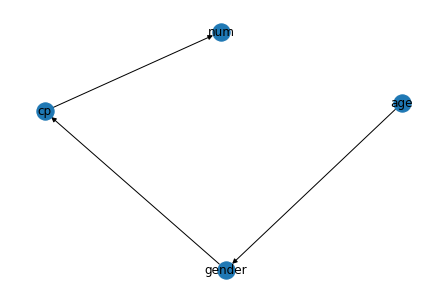

In [ ]:
nx.draw(model, with_labels=True)